# 목차
* **1. Z-표준화**
* **2. Min-Max**
* **3. Robust**

# 1. 표준정규화
* 데이터의 범위가 같아지도록 변수별로 값을 비례적으로 저정하는 과정
* 변수들의 측정단위나 값 범위가 다를 때 적용
### 1.1 Z-표준화
* <span style='background-color: #fff5b1'>각 값이 평균에서 얼마나 떨어져 있는지를 나타내는 척도</span> 
* 변환 후 평균은 0, 표준편차는 1이다.
    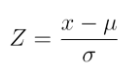
* x = 각 데이터 값
* µ = 데이터의 평균
* σ = 데이터의 표준편차

##### 문제
* 한국인 1,000명의 연간 육류소비량이 53.9kg, 표준편차 5kg의 정규분포를 따른다.
* 일본인 1,000명의 연간 육류소비량이 32.7kg, 표준편차 4kg의 정규분포를 따른다.
* 두 집단의 육류소비량을 **<U>평균이 0, 표준편차가 1인 표준정규분포로 표준화</U>** 해본다.

In [89]:
import numpy as np
import pandas as pd

meat_consumption_korea = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"korea":meat_consumption_korea, "japan":meat_consumption_japan})

meat_consumption.head(6)

,korea,japan
0,59.967106,26.111804
1,53.089737,32.124673
2,52.236517,34.183455
3,49.248671,36.248686
4,45.322445,31.646564
5,54.594372,31.019730


* 이때 히스토그램을 보면 분포가 다르다. -> <span style='background-color: #fff5b1'>각각의 데이터의 범위가 다르다.</span>

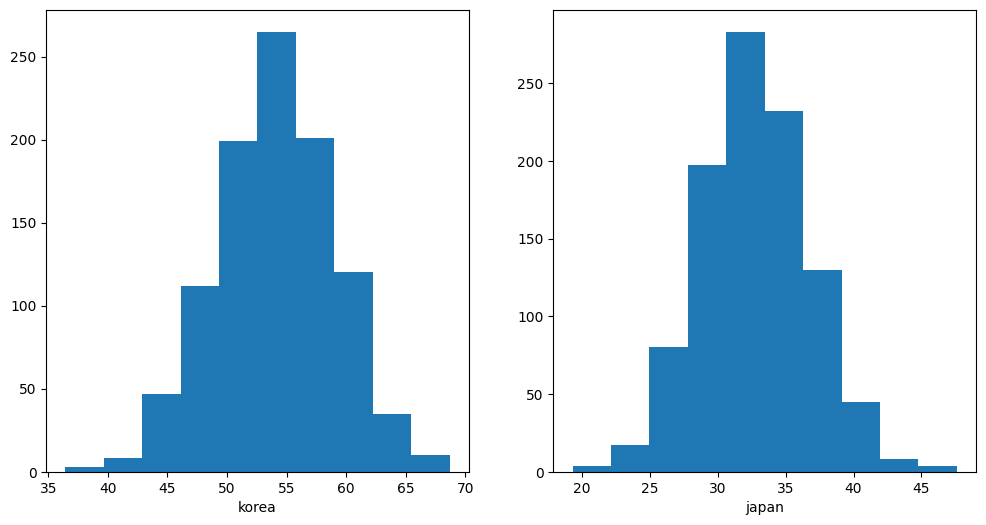

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(121); plt.hist(meat_consumption_korea); plt.xlabel("korea")
plt.subplot(122); plt.hist(meat_consumption_japan); plt.xlabel("japan")

plt.show()

In [91]:
# Solution 1 -> 직접 구현
meat_consumption["korea normalization 1"] = (meat_consumption_korea - np.mean(meat_consumption_korea))/np.std(meat_consumption_korea)
meat_consumption["japan normalization 1"] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,korea,japan,korea normalization 1,japan normalization 1
0,59.967106,26.111804,1.195676,-1.665034
1,53.089737,32.124673,-0.202588,-0.171406
2,52.236517,34.183455,-0.376059,0.340006
3,49.248671,36.248686,-0.983529,0.853020
4,45.322445,31.646564,-1.781785,-0.290171


In [92]:
# Solution 2 -> stats 라이브러리
import scipy.stats as ss

meat_consumption["korea normalization 2"] = ss.zscore(meat_consumption_korea)
meat_consumption["japan normalization 2"] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,korea,japan,korea normalization 1,japan normalization 1,korea normalization 2,japan normalization 2
0,59.967106,26.111804,1.195676,-1.665034,1.195676,-1.665034
1,53.089737,32.124673,-0.202588,-0.171406,-0.202588,-0.171406
2,52.236517,34.183455,-0.376059,0.340006,-0.376059,0.340006
3,49.248671,36.248686,-0.983529,0.853020,-0.983529,0.853020
4,45.322445,31.646564,-1.781785,-0.290171,-1.781785,-0.290171


In [93]:
# Solution 3 -> sklearn 라이브러리
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["korea normalization 3"] = scaler.fit_transform(meat_consumption[["korea"]])
meat_consumption["japan normalization 3"] = scaler.fit_transform(meat_consumption[["japan"]])

meat_consumption.head()

,korea,japan,korea normalization 1,japan normalization 1,korea normalization 2,japan normalization 2,korea normalization 3,japan normalization 3
0,59.967106,26.111804,1.195676,-1.665034,1.195676,-1.665034,1.195676,-1.665034
1,53.089737,32.124673,-0.202588,-0.171406,-0.202588,-0.171406,-0.202588,-0.171406
2,52.236517,34.183455,-0.376059,0.340006,-0.376059,0.340006,-0.376059,0.340006
3,49.248671,36.248686,-0.983529,0.853020,-0.983529,0.853020,-0.983529,0.853020
4,45.322445,31.646564,-1.781785,-0.290171,-1.781785,-0.290171,-1.781785,-0.290171


* 이때의 히스토그램을 살펴보면 <span style='background-color: #fff5b1'>평균은 0 표준편차는 1로 분포</span>가 구성되어 있는것을 확인할 수 있다.

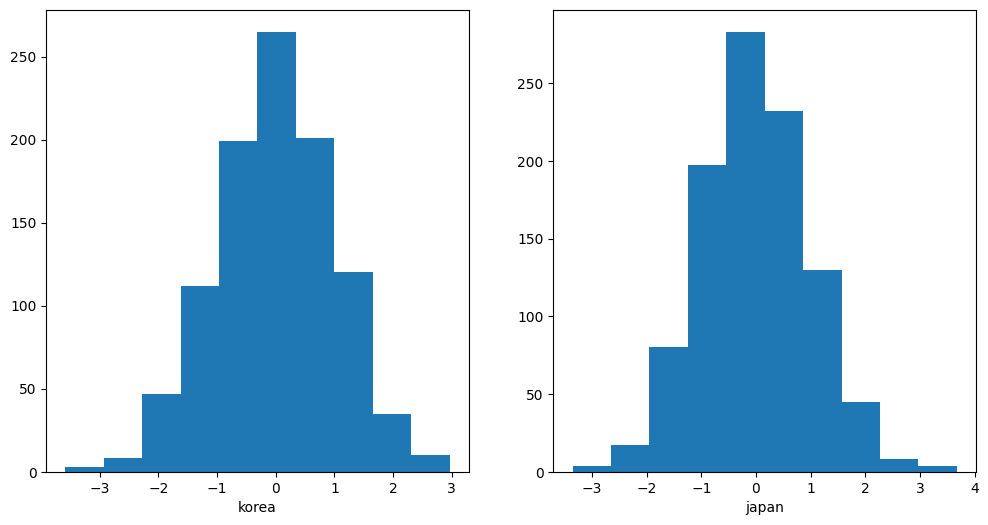

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(121); plt.hist(meat_consumption["korea normalization 1"]); plt.xlabel("korea")
plt.subplot(122); plt.hist(meat_consumption["japan normalization 1"]); plt.xlabel("japan")

plt.show()

### 1.2 Min-Max Scaler
* 연속형 변수의 값을 0과 1사이의 값으로 변환
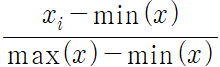

In [95]:
# Solution 1 -> 직접 구현
min = np.min(meat_consumption_korea)
max = np.max(meat_consumption_korea)
meat_consumption["korea_mm_1"] = (meat_consumption[["korea"]] - min) / (max - min)

min = np.min(meat_consumption_japan)
max = np.max(meat_consumption_japan)
meat_consumption["japan_mm_1"] = (meat_consumption[["japan"]] - min) / (max - min)

meat_consumption.head()

,korea,japan,korea normalization 1,japan normalization 1,korea normalization 2,japan normalization 2,korea normalization 3,japan normalization 3,korea_mm_1,japan_mm_1
0,59.967106,26.111804,1.195676,-1.665034,1.195676,-1.665034,1.195676,-1.665034,0.730008,0.240290
1,53.089737,32.124673,-0.202588,-0.171406,-0.202588,-0.171406,-0.202588,-0.171406,0.516674,0.452765
2,52.236517,34.183455,-0.376059,0.340006,-0.376059,0.340006,-0.376059,0.340006,0.490207,0.525515
3,49.248671,36.248686,-0.983529,0.853020,-0.983529,0.853020,-0.983529,0.853020,0.397525,0.598494
4,45.322445,31.646564,-1.781785,-0.290171,-1.781785,-0.290171,-1.781785,-0.290171,0.275735,0.435870


In [96]:
# Solution 2 -> sklearn 라이브러리
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["korea_mm_2"] = scaler.fit_transform(meat_consumption[["korea"]])

scaler = MinMaxScaler()
meat_consumption["japan_mm_2"] = scaler.fit_transform(meat_consumption[["japan"]])

meat_consumption.head()

,korea,japan,korea normalization 1,japan normalization 1,korea normalization 2,japan normalization 2,korea normalization 3,japan normalization 3,korea_mm_1,japan_mm_1,korea_mm_2,japan_mm_2
0,59.967106,26.111804,1.195676,-1.665034,1.195676,-1.665034,1.195676,-1.665034,0.730008,0.240290,0.730008,0.240290
1,53.089737,32.124673,-0.202588,-0.171406,-0.202588,-0.171406,-0.202588,-0.171406,0.516674,0.452765,0.516674,0.452765
2,52.236517,34.183455,-0.376059,0.340006,-0.376059,0.340006,-0.376059,0.340006,0.490207,0.525515,0.490207,0.525515
3,49.248671,36.248686,-0.983529,0.853020,-0.983529,0.853020,-0.983529,0.853020,0.397525,0.598494,0.397525,0.598494
4,45.322445,31.646564,-1.781785,-0.290171,-1.781785,-0.290171,-1.781785,-0.290171,0.275735,0.435870,0.275735,0.435870


### 1.3 Robust
* 데이터의 중앙값 = 0, IQR = 1이 되도록 스케일링하는 기법
* 모든 변수들이 같은 스케일을 갖게 되며, StandardScaler에 비해 스케일링 결과가 더 넓은 범위로 분포
* <span style='background-color: #fff5b1'>StandardScaler에 비해 이상치의 영향이 적어진다는 장점</span>
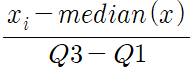

In [100]:
# Solution 1 -> sklearn 라이브러리
from sklearn.preprocessing import RobustScaler


robustScaler = RobustScaler()
meat_consumption["korea_robust"] = robustScaler.fit_transform(meat_consumption[["korea"]])

robustScaler = RobustScaler()
meat_consumption["japan_robust"] = robustScaler.fit_transform(meat_consumption[["japan"]])

# 결과 확인
meat_consumption.head()


,korea,japan,korea normalization 1,japan normalization 1,korea normalization 2,japan normalization 2,korea normalization 3,japan normalization 3,korea_mm_1,japan_mm_1,korea_mm_2,japan_mm_2,korea_robust,japan_robust
0,59.967106,26.111804,1.195676,-1.665034,1.195676,-1.665034,1.195676,-1.665034,0.730008,0.240290,0.730008,0.240290,0.840259,-1.206129
1,53.089737,32.124673,-0.202588,-0.171406,-0.202588,-0.171406,-0.202588,-0.171406,0.516674,0.452765,0.516674,0.452765,-0.186982,-0.108463
2,52.236517,34.183455,-0.376059,0.340006,-0.376059,0.340006,-0.376059,0.340006,0.490207,0.525515,0.490207,0.525515,-0.314424,0.267373
3,49.248671,36.248686,-0.983529,0.853020,-0.983529,0.853020,-0.983529,0.853020,0.397525,0.598494,0.397525,0.598494,-0.760705,0.644387
4,45.322445,31.646564,-1.781785,-0.290171,-1.781785,-0.290171,-1.781785,-0.290171,0.275735,0.435870,0.275735,0.435870,-1.347148,-0.195743


* Robust와 StandardScaler 범위를 비교해보면 Robust가 더 넓은 것 확인 가능

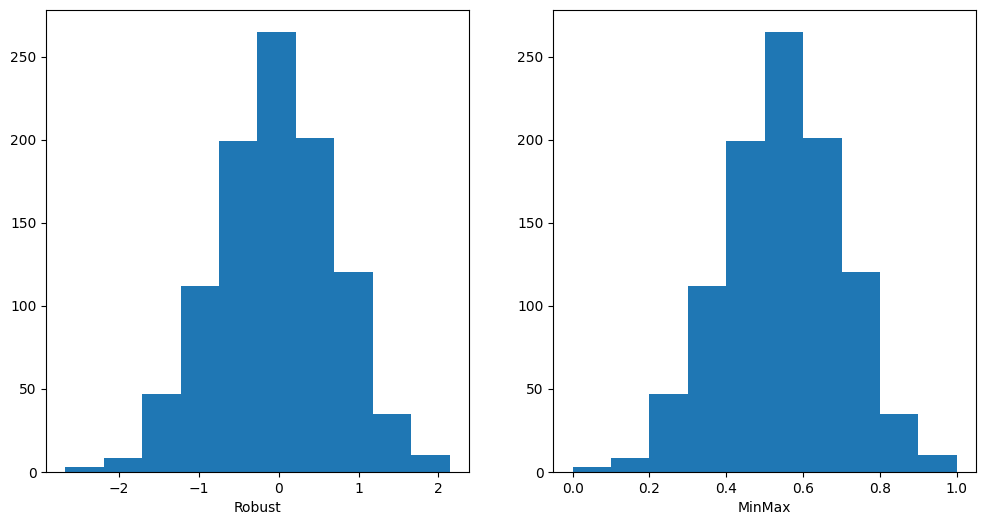

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(121); plt.hist(meat_consumption["korea_robust"]); plt.xlabel("Robust")
plt.subplot(122); plt.hist(meat_consumption["korea_mm_1"]); plt.xlabel("MinMax")

plt.show()